***Import Necessary Libraries***

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

***Loading Dataset***

In [2]:
expenses = pd.read_csv("expenses.csv")
df = expenses.copy()

# Structure and nature of data

In [4]:
df.head() #First 5 observations of the dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.tail()  #Last 5 observations of the dataset

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.describe().T #Descriptive statistics of the dataset

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.dtypes #variable types

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

The gender variable is in the object type. I will change it to Category type with pandas library:

In [12]:
df.sex = pd.Categorical(df.sex) 

In [13]:
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker        object
region        object
charges      float64
dtype: object

In [21]:
df.smoker = pd.Categorical(df.smoker) 

In [22]:
df.region = pd.Categorical(df.region) 

In [25]:
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Are there any missing values in the data set?

In [15]:
df.isnull().values.any()

False

There are no missing values in the dataset

**Only Categorical Variables and Summaries**

In [26]:
kat_df = df.select_dtypes(include = ["category"])

In [27]:
kat_df.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [19]:
kat_df.sex.unique() #Values of the categorical variable

['female', 'male']
Categories (2, object): ['female', 'male']

In [20]:
kat_df["sex"].value_counts().count()

2

In [28]:
kat_df.smoker.unique()

['yes', 'no']
Categories (2, object): ['no', 'yes']

In [29]:
kat_df["smoker"].value_counts().count()

2

In [30]:
kat_df.region.unique()

['southwest', 'southeast', 'northwest', 'northeast']
Categories (4, object): ['northeast', 'northwest', 'southeast', 'southwest']

In [31]:
kat_df["region"].value_counts().count()

4

How many rows and columns does the dataset consist of?

In [33]:
df.shape

(1338, 7)

Accessing the Frequencies of the Classes of a Categorical Variable

In [34]:
kat_df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [35]:
kat_df["region"].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [36]:
kat_df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

**summaries of numeric variables**

In [38]:
df_num = df.select_dtypes(include = ["float64", "int64"])

In [39]:
df_num.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [40]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [41]:
df_num["age"].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [42]:
df_num["bmi"].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [43]:
df_num["children"].describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

In [44]:
df_num["charges"].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

**Catching Outliers**

In [46]:
df_age = df["age"]
df_bmi = df["bmi"]
df_children = df["children"]
df_charges = df["charges"]

I will check with the boxplot chart, but the boxplot chart does not give detailed information.

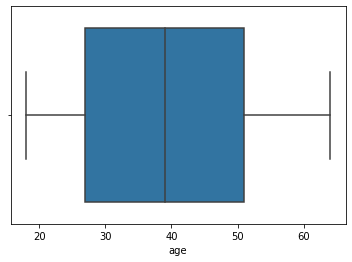

In [47]:
sns.boxplot(x = df_age)

There doesn't seem to be any outliers for the age variable

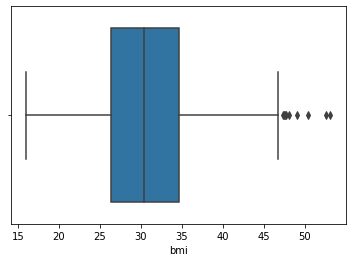

In [48]:
sns.boxplot(x = df_bmi)

There seem to be outliers for the BMI variable

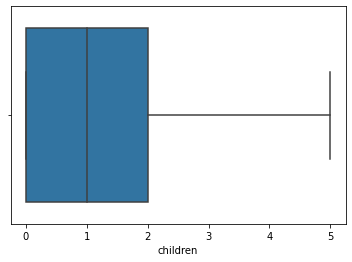

In [49]:
sns.boxplot(x = df_children)

There doesn't seem to be any outliers for the children variable

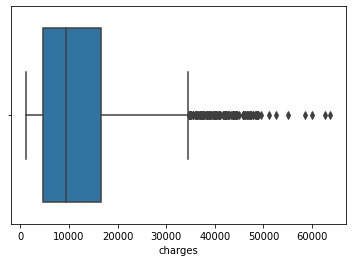

In [50]:
sns.boxplot(x = df_charges)

There seem to be outliers for the charges variable

Let's observe the outliers in more detail by applying statistical methods.

In [143]:
Q1_age = df_age.quantile(0.25) #will take the value corresponding to 25% of the variable when sorted from smallest to largest.
Q3_age = df_age.quantile(0.75) #will take the value corresponding to 75% of the variable when sorted from smallest to largest.
IQR_age = Q3_age-Q1_age

In [144]:
Q1_age

27.0

In [145]:
Q3_age

51.0

In [146]:
IQR_age

24.0

In [147]:
lower_bound_age = Q1_age- 1.5*IQR_age #Defining threshold values
upper_bound_age = Q3_age + 1.5*IQR_age

In [60]:
lower_bound_age

-9.0

In [61]:
upper_bound_age

87.0

In [142]:
(df_age < lower_bound_age).sum() | (df_age > upper_bound_age).sum()

0

It supports boxplot plot. Age variable has no outlier

In [97]:
Q1_bmi = df_bmi.quantile(0.25) 
Q3_bmi = df_bmi.quantile(0.75)
IQR_bmi = Q3_bmi-Q1_bmi

In [98]:
Q1_bmi

26.29625

In [99]:
Q3_bmi

34.69375

In [100]:
IQR_bmi

8.3975

In [123]:
lower_bound_bmi = Q1_bmi- 1.5*IQR_bmi
upper_bound_bmi = Q3_bmi + 1.5*IQR_bmi

In [124]:
lower_bound_bmi

13.7

In [125]:
upper_bound_bmi

47.290000000000006

In [141]:
(df_bmi < lower_bound_bmi).sum() | (df_bmi > upper_bound_bmi).sum()

9

In [127]:
outlier_tf_bmi_l = (df_bmi < lower_bound_bmi)

In [128]:
outlier_tf_bmi_l.head()

0    False
1    False
2    False
3    False
4    False
Name: bmi, dtype: bool

In [129]:
df_bmi[outlier_tf_bmi_l]

Series([], Name: bmi, dtype: float64)

In [130]:
outlier_tf_bmi_u = (df_bmi > upper_bound_bmi)

In [131]:
outlier_tf_bmi_u.head()

0    False
1    False
2    False
3    False
4    False
Name: bmi, dtype: bool

In [132]:
df_bmi[outlier_tf_bmi_u]

116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64

In [134]:
df_bmi[outlier_tf_bmi_u].index #indexes of observations with outliers.

Int64Index([116, 286, 401, 543, 847, 860, 1047, 1088, 1317], dtype='int64')

It supports boxplot. BMI variable has 9 outliers

In [115]:
Q1_children = df_children.quantile(0.25) 
Q3_children = df_children.quantile(0.75)
IQR_children = Q3_children-Q1_children

In [116]:
Q1_children

0.0

In [117]:
Q3_children

2.0

In [118]:
IQR_children

2.0

In [121]:
lower_bound_children = Q1_children- 1.5*IQR_children
upper_bound_children = Q3_children + 1.5*IQR_children

In [122]:
lower_bound_children

-3.0

In [135]:
upper_bound_children

5.0

In [140]:
(df_children < lower_bound_children).sum() | (df_children > upper_bound_children).sum()

0

It supports boxplot. Children variable has no outlier

In [148]:
Q1_charges = df_charges.quantile(0.25) 
Q3_charges = df_charges.quantile(0.75)
IQR_charges = Q3_charges-Q1_charges

In [149]:
Q1_charges

4740.28715

In [150]:
Q3_charges

16639.912515

In [151]:
IQR_charges

11899.625365

In [152]:
lower_bound_charges = Q1_charges- 1.5*IQR_charges
upper_bound_charges = Q3_charges + 1.5*IQR_charges

In [153]:
lower_bound_charges

-13109.1508975

In [154]:
upper_bound_charges

34489.350562499996

In [155]:
(df_charges < lower_bound_charges).sum() | (df_charges > upper_bound_charges).sum()

139

In [156]:
outlier_tf_charges_l = (df_charges < lower_bound_charges)

In [159]:
df_charges[outlier_tf_charges_l]

Series([], Name: charges, dtype: float64)

In [160]:
outlier_tf_charges_u = (df_charges > upper_bound_charges)

In [161]:
df_charges[outlier_tf_charges_u]

14      39611.75770
19      36837.46700
23      37701.87680
29      38711.00000
30      35585.57600
           ...     
1300    62592.87309
1301    46718.16325
1303    37829.72420
1313    36397.57600
1323    43896.37630
Name: charges, Length: 139, dtype: float64

It supports boxplot. Charges variable has 139 outliers

# **Exploratory Data Analysis (EDA)**

In [193]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


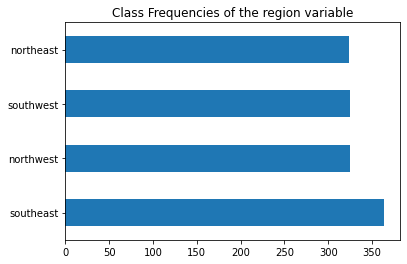

In [165]:
df["region"].value_counts().plot.barh().set_title("Class Frequencies of the region variable");

I observe that the class frequencies of the variable region are close to each other

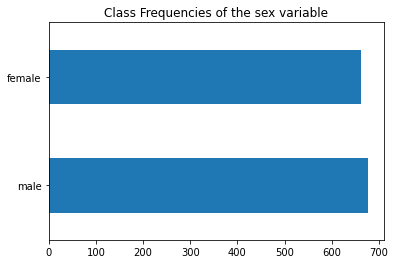

In [166]:
df["sex"].value_counts().plot.barh().set_title("Class Frequencies of the sex variable");

I observe that the class frequencies of the variable sex are close to each other





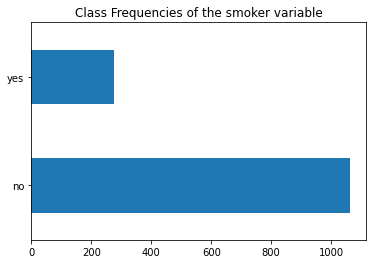

In [167]:
df["smoker"].value_counts().plot.barh().set_title("Class Frequencies of the smoker variable");

I observe that non-smokers are much more than smokers

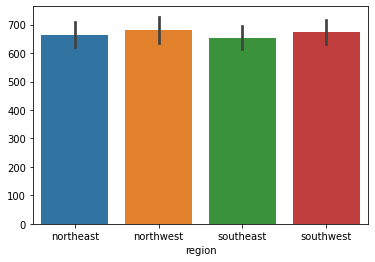

In [168]:
sns.barplot(x = "region", y = df.region.index, data= df);

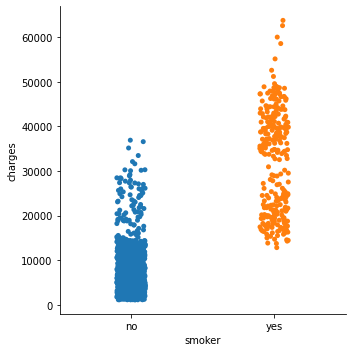

In [169]:
sns.catplot(x = "smoker", y = "charges", data = df);

Smokers expenditure much more than non-smokers.

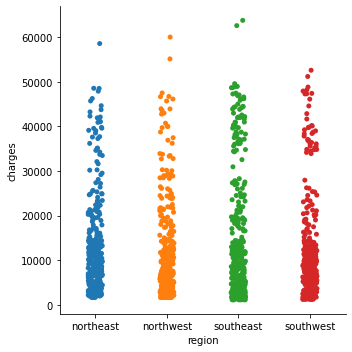

In [178]:
sns.catplot(x = "region", y = "charges", data = df);

The highest expenditure was seen in the southeast region, but overall there was not much difference between regions.

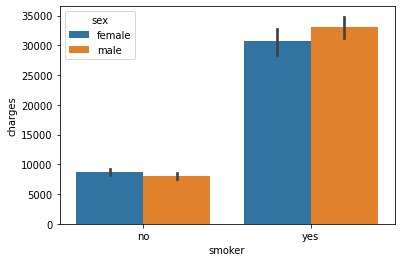

In [173]:
sns.barplot(x = "smoker", y = "charges", hue = "sex", data = df);

The highest expenditure is in men who smoke.

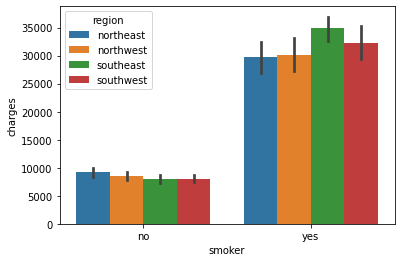

In [174]:
sns.barplot(x = "smoker", y = "charges", hue = "region", data = df);

The highest expenditure is in smokers and those living in the southeast region.

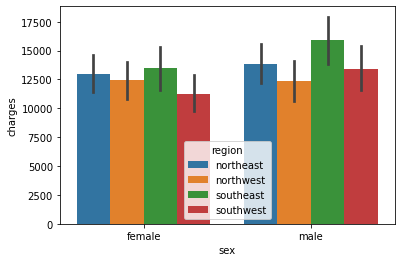

In [177]:
sns.barplot(x = "sex", y = "charges", hue = "region", data = df);

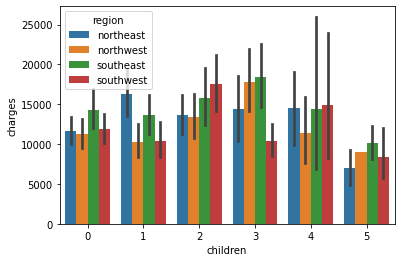

In [196]:
sns.barplot(x = "children", y = "charges", hue = "region", data = df);

Superficially, the highest expenditure from these graphs is seen among men who smokes and living in the southeast region.

In [ ]:
sns.barplot(x = "sex", y = "charges", hue = "region", data = df);

In [175]:
df.groupby(["smoker","sex"])["charges"].mean()

smoker  sex   
no      female     8762.297300
        male       8087.204731
yes     female    30678.996276
        male      33042.005975
Name: charges, dtype: float64

In [176]:
df.groupby(["smoker","region"])["charges"].mean()

smoker  region   
no      northeast     9165.531672
        northwest     8556.463715
        southeast     8032.216309
        southwest     8019.284513
yes     northeast    29673.536473
        northwest    30192.003182
        southeast    34844.996824
        southwest    32269.063494
Name: charges, dtype: float64

In [180]:
df.groupby(["sex","region"])["charges"].mean()

sex     region   
female  northeast    12953.203151
        northwest    12479.870397
        southeast    13499.669243
        southwest    11274.411264
male    northeast    13854.005374
        northwest    12354.119575
        southeast    15879.617173
        southwest    13412.883576
Name: charges, dtype: float64

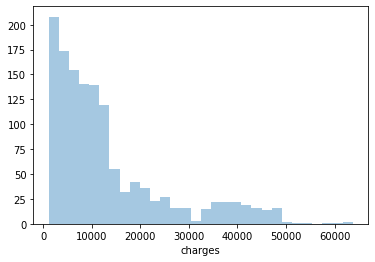

In [186]:
sns.distplot(df.charges, kde = False);

charges variable has right-skewed distribution

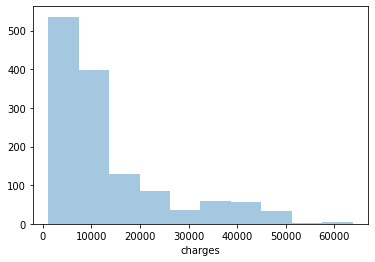

In [187]:
sns.distplot(df.charges, bins = 10, kde = False);

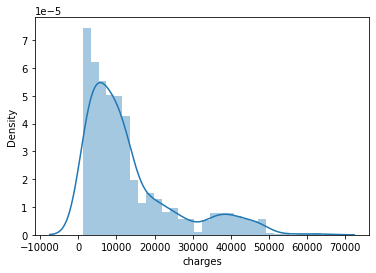

In [188]:
sns.distplot(df.charges);

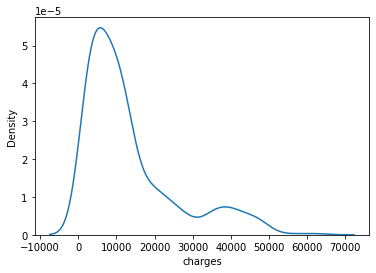

In [190]:
sns.distplot(df.charges, hist = False);

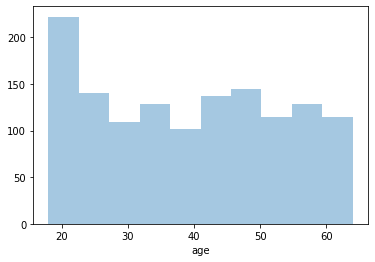

In [191]:
sns.distplot(df.age, bins = 10, kde = False);

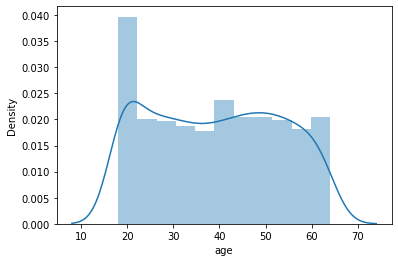

In [192]:
sns.distplot(df.age);

charges variable has right-skewed distribution

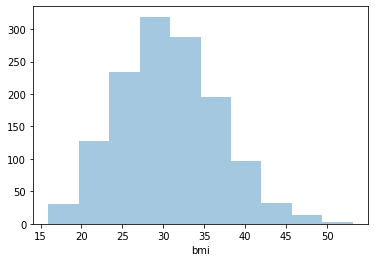

In [197]:
sns.distplot(df.bmi, bins = 10, kde = False);

bmi variable has right-skewed distribution

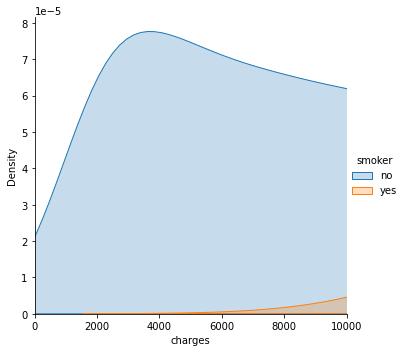

In [198]:
(sns
 .FacetGrid(df,
              hue = "smoker",
              height = 5,
              xlim = (0, 10000))
 .map(sns.kdeplot, "charges", shade= True)
 .add_legend()
);

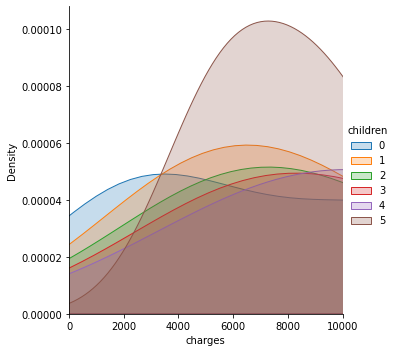

In [199]:
(sns
 .FacetGrid(df,
              hue = "children",
              height = 5,
              xlim = (0, 10000))
 .map(sns.kdeplot, "charges", shade= True)
 .add_legend()
);

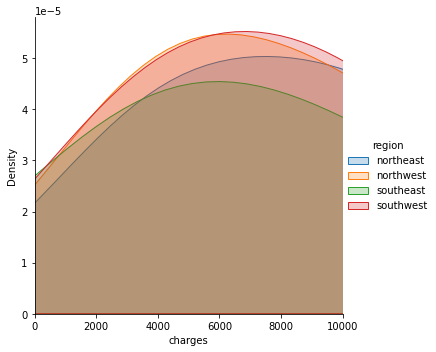

In [201]:
(sns
 .FacetGrid(df,
              hue = "region",
              height = 5,
              xlim = (0, 10000))
 .map(sns.kdeplot, "charges", shade= True)
 .add_legend()
);

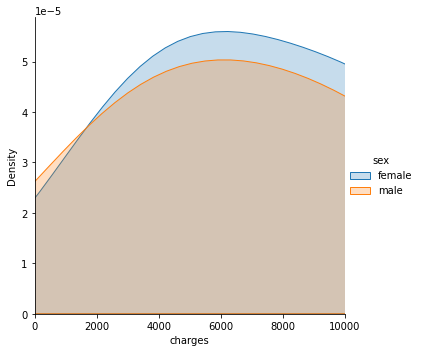

In [202]:
(sns
 .FacetGrid(df,
              hue = "sex",
              height = 5,
              xlim = (0, 10000))
 .map(sns.kdeplot, "charges", shade= True)
 .add_legend()
);

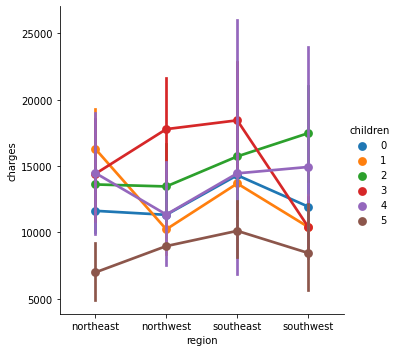

In [206]:
sns.catplot(x = "region", y = "charges", hue = "children", kind = "point", data = df);

Which region has more expenditure?

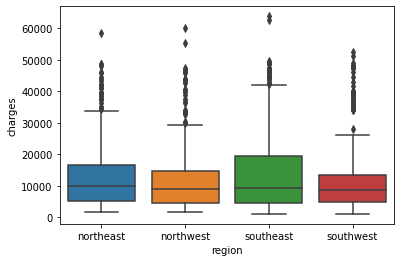

In [207]:
sns.boxplot(x = "region", y = "charges", data = df);

southeast

Which gender has more expenditure?

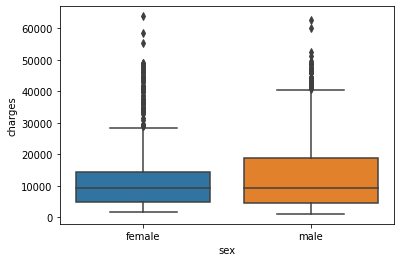

In [209]:
sns.boxplot(x = "sex", y = "charges", data = df);

male

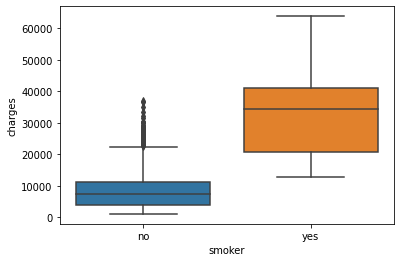

In [210]:
sns.boxplot(x = "smoker", y = "charges", data = df);

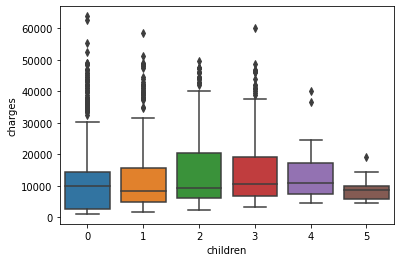

In [211]:
sns.boxplot(x = "children", y = "charges", data = df);

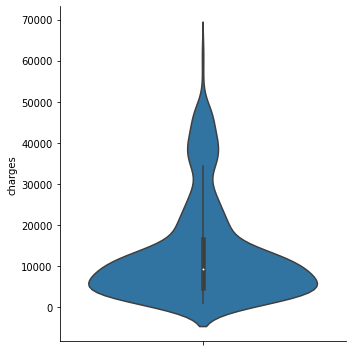

In [212]:
sns.catplot(y = "charges", kind = "violin", data = df);

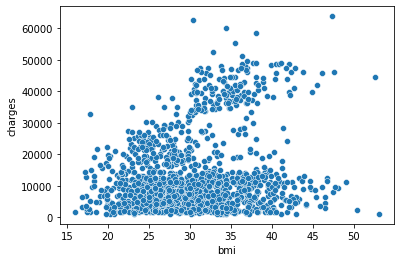

In [214]:
sns.scatterplot(x = "bmi", y = "charges", data = df);

It's not a linear graph. However, I can see that the charges variable increases as the bmi value increases.

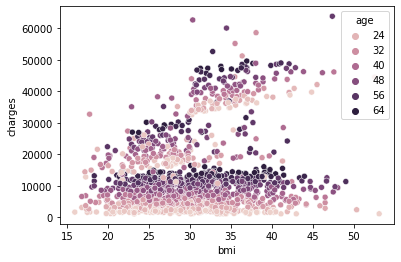

In [215]:
sns.scatterplot(x = "bmi", y = "charges", hue = "age",data = df);

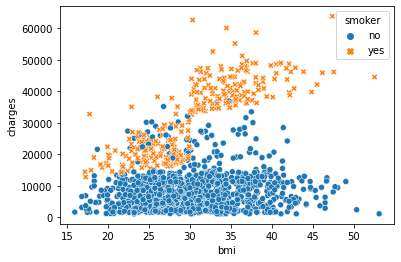

In [216]:
sns.scatterplot(x = "bmi", y = "charges", hue = "smoker", style = "smoker", data = df);

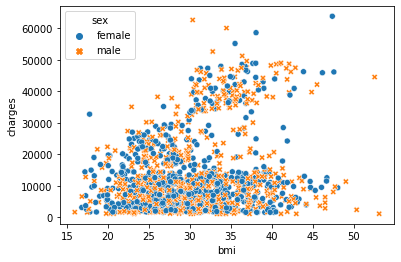

In [217]:
sns.scatterplot(x = "bmi", y = "charges", hue = "sex", style = "sex", data = df);

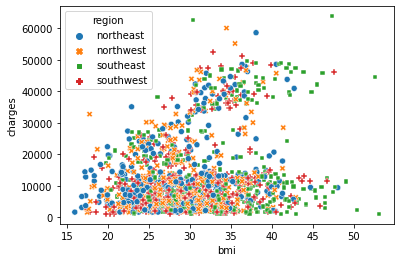

In [218]:
sns.scatterplot(x = "bmi", y = "charges", hue = "region", style = "region", data = df);

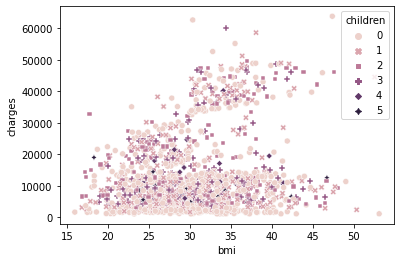

In [219]:
sns.scatterplot(x = "bmi", y = "charges", hue = "children", style = "children", data = df);

**Showing the Linear Relationship**

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


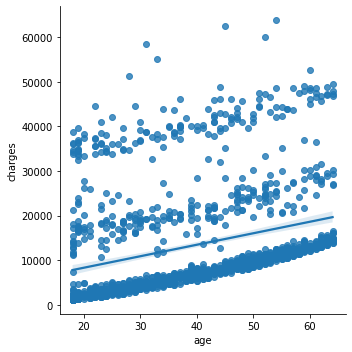

In [223]:
sns.lmplot(x = "age", y = "charges", data = df);

There is no linear relationship between them

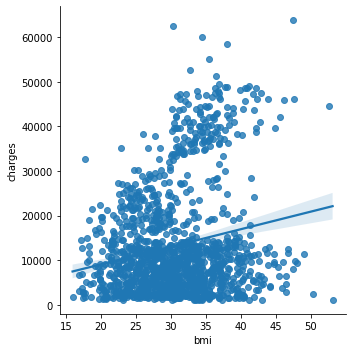

In [224]:
sns.lmplot(x = "bmi", y = "charges", data = df);

There is no linear relationship between them

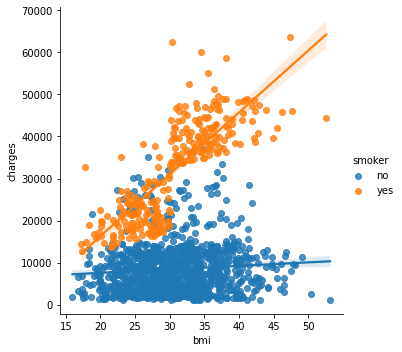

In [225]:
sns.lmplot(x = "bmi", y = "charges", hue = "smoker", data = df);

As the smoker and bmi variables increase, the charges variable also increases considerably.

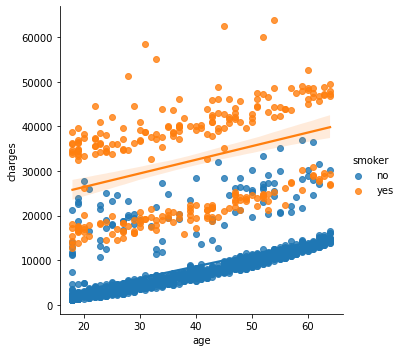

In [226]:
sns.lmplot(x = "age", y = "charges", hue = "smoker", data = df);

As the smoker and age variables increase, the charges variable also increases.

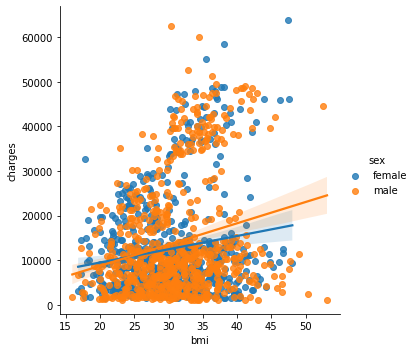

In [228]:
sns.lmplot(x = "bmi", y = "charges", hue = "sex", data = df);

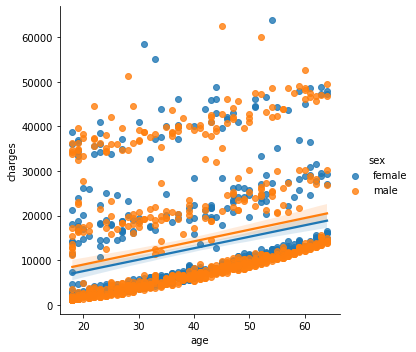

In [229]:
sns.lmplot(x = "age", y = "charges", hue = "sex", data = df);

In general, there is no linear relationship between the variables. This may be due to the skewness of the distribution within the variables themselves.

**Scatterplot Matrix**

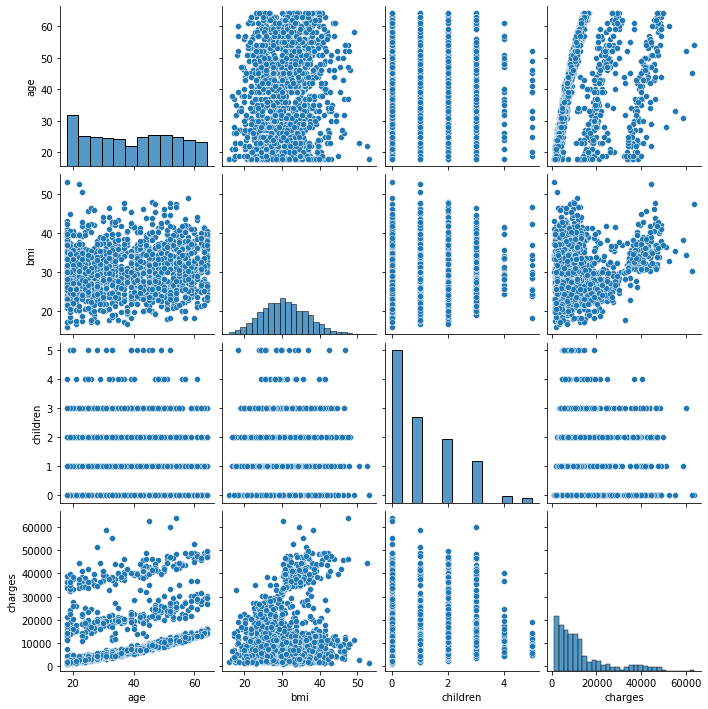

In [230]:
sns.pairplot(df);

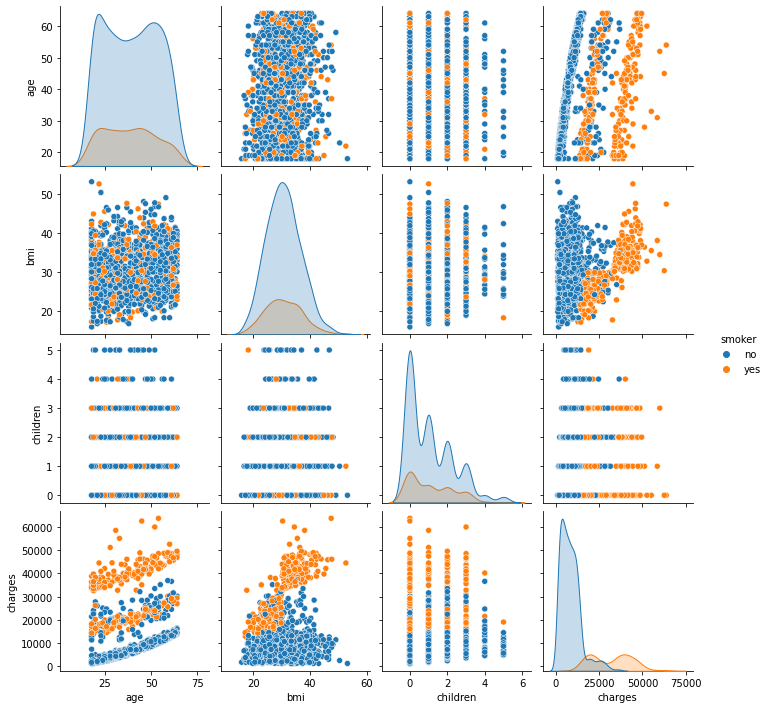

In [232]:
sns.pairplot(df, hue = "smoker");

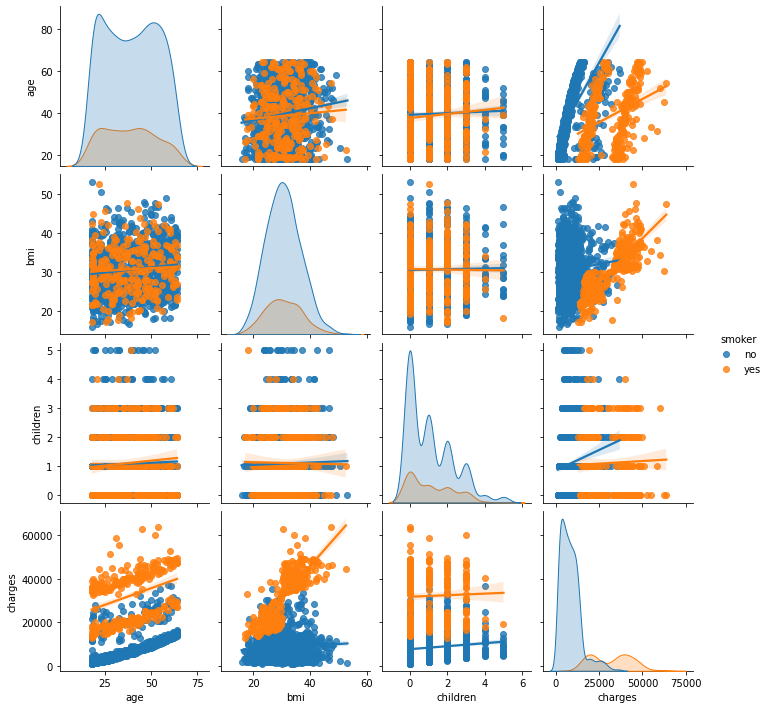

In [234]:
sns.pairplot(df, kind = "reg", hue = "smoker");

**Heatmap**

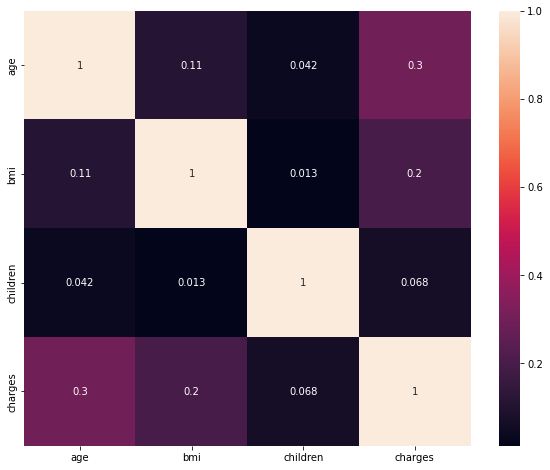

In [236]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True, data=df)

There is no high correlation between numerical variables